In [1]:
# Mount Drive files
from google.colab import drive
drive.mount('/content/drive', readonly=False, force_remount=True)

Mounted at /content/drive


In [2]:
!git clone https://github.com/facebookresearch/fastText.git
!cd fastText
!pip install fastText -q

Cloning into 'fastText'...
remote: Enumerating objects: 3998, done.
remote: Counting objects: 100% (1057/1057), done.
remote: Compressing objects: 100% (197/197), done.
remote: Total 3998 (delta 922), reused 889 (delta 855), pack-reused 2941
Receiving objects: 100% (3998/3998), 8.30 MiB | 10.01 MiB/s, done.
Resolving deltas: 100% (2529/2529), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
!git clone https://github.com/artetxem/vecmap.git

Cloning into 'vecmap'...
remote: Enumerating objects: 104, done.
remote: Total 104 (delta 0), reused 0 (delta 0), pack-reused 104
Receiving objects: 100% (104/104), 72.59 KiB | 24.20 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [4]:
!ls

drive  fastText  sample_data  vecmap


In [5]:
import fasttext.util
import os
import re
import matplotlib.pyplot as plt

from gensim.models import Word2Vec
from typing import List
import string

# documentation: https://radimrehurek.com/gensim/models/word2vec.html

In [6]:
DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/Machine Translation and Multilingualism/MT Final Project/Data/"
MODEL_PATH = "/content/drive/MyDrive/Colab Notebooks/Machine Translation and Multilingualism/MT Final Project/Model/"
FASTTEXT_PATH = os.path.join(DATA_PATH, "fasttext/")
EMBEDDING_PATH = os.path.join(DATA_PATH, "embedding/")
TRAIN_TEST_PATH = os.path.join(DATA_PATH, "DICT/")

In [7]:
# reference: https://opus.nlpl.eu/results/id&en/corpus-result-table
CORPUS_PATH = os.path.join(DATA_PATH, "corpus/")

In [34]:
W2V_ID_EMB_PATH = os.path.join(EMBEDDING_PATH,'w2v/w2v.embeddings.id')
W2V_NAH_EMB_PATH = os.path.join(EMBEDDING_PATH,'w2v/w2v.embeddings.nah')

PRETRAINED_FT_ID_EMB_PATH = os.path.join(EMBEDDING_PATH,'pretrained-fasttext.embeddings.id')
PRETRAINED_FT_NAH_EMB_PATH = os.path.join(EMBEDDING_PATH,'pretrained-fasttext.embeddings.nah')

FT_ID_EMB_PATH = os.path.join(EMBEDDING_PATH,'fasttext.embeddings.id')
FT_NAH_EMB_PATH = os.path.join(EMBEDDING_PATH,'fasttext.embeddings.nah')

In [13]:
SEMISUP_27_MAPPED_ENID_ID_EMB_PATH = os.path.join(EMBEDDING_PATH,'semisupervised_mapped_embeddings.en-id.27.id')
SEMISUP_1500_MAPPED_ENID_ID_EMB_PATH = os.path.join(EMBEDDING_PATH,'semisupervised_mapped_embeddings.en-id.1500.id')
SEMISUP_WORDS_MAPPED_ENNAH_NAH_EMB_PATH = os.path.join(EMBEDDING_PATH,'semisupervised_mapped_embeddings.en-nah.words.nah')

SEMISUP_NUMERAL_MAPPED_ENID_ID_EMB_PATH = os.path.join(EMBEDDING_PATH,'semisupervised_mapped_embeddings.en-id.num.id')
SEMISUP_NUMERAL_MAPPED_ENNAH_NAH_EMB_PATH = os.path.join(EMBEDDING_PATH,'semisupervised_mapped_embeddings.en-nah.num.nah')

UNSUP_MAPPED_ENID_ID_EMB_PATH = os.path.join(EMBEDDING_PATH,'unsupervised_mapped_embeddings.en-id.id')
UNSUP_MAPPED_ENNAH_NAH_EMB_PATH = os.path.join(EMBEDDING_PATH,'unsupervised_mapped_embeddings.en-nah.nah')

In [18]:
RAW_ID_NAH_TEST_DICT_PATH = os.path.join(TRAIN_TEST_PATH, 'IND_NH.txt')

In [15]:
!ls "$DATA_PATH"

corpus	DICT  embedding  fasttext  train_test


In [27]:
ID_NAH_TEST_DICT_PATH = "test.id.nah"
with open(RAW_ID_NAH_TEST_DICT_PATH) as f:
  lines = f.readlines()

with open(ID_NAH_TEST_DICT_PATH, "w") as f:
  for line in lines:
    if len(line.split()) > 2:
      continue
    f.write(line)

In [28]:
!wc "$RAW_ID_NAH_TEST_DICT_PATH"

 100  212 1585 /content/drive/MyDrive/Colab Notebooks/Machine Translation and Multilingualism/MT Final Project/Data/DICT/IND_NH.txt


In [29]:
!wc "$ID_NAH_TEST_DICT_PATH"

  88  176 1311 test.id.nah


# Fasttext (better than Word2Vec)

## 1. Evaluation

In [30]:
!python3 "vecmap/eval_translation.py" "$UNSUP_MAPPED_ENID_ID_EMB_PATH" "$UNSUP_MAPPED_ENNAH_NAH_EMB_PATH" -d "$ID_NAH_TEST_DICT_PATH"
!python3 "vecmap/eval_translation.py" "$UNSUP_MAPPED_ENID_ID_EMB_PATH" "$UNSUP_MAPPED_ENNAH_NAH_EMB_PATH" -d "$ID_NAH_TEST_DICT_PATH" --retrieval csls

Coverage: 33.72%  Accuracy:  0.00%
Coverage: 33.72%  Accuracy:  0.00%


In [31]:
!python3 "vecmap/eval_translation.py" "$SEMISUP_NUMERAL_MAPPED_ENID_ID_EMB_PATH" "$SEMISUP_NUMERAL_MAPPED_ENNAH_NAH_EMB_PATH" -d "$ID_NAH_TEST_DICT_PATH"
!python3 "vecmap/eval_translation.py" "$SEMISUP_NUMERAL_MAPPED_ENID_ID_EMB_PATH" "$SEMISUP_NUMERAL_MAPPED_ENNAH_NAH_EMB_PATH" -d "$ID_NAH_TEST_DICT_PATH" --retrieval csls

Coverage: 33.72%  Accuracy:  0.00%
Coverage: 33.72%  Accuracy:  0.00%


In [32]:
!python3 "vecmap/eval_translation.py" "$SEMISUP_27_MAPPED_ENID_ID_EMB_PATH" "$SEMISUP_WORDS_MAPPED_ENNAH_NAH_EMB_PATH" -d "$ID_NAH_TEST_DICT_PATH"
!python3 "vecmap/eval_translation.py" "$SEMISUP_27_MAPPED_ENID_ID_EMB_PATH" "$SEMISUP_WORDS_MAPPED_ENNAH_NAH_EMB_PATH" -d "$ID_NAH_TEST_DICT_PATH" --retrieval csls

Coverage: 33.72%  Accuracy:  0.00%
Coverage: 33.72%  Accuracy:  0.00%


In [33]:
!python3 "vecmap/eval_translation.py" "$SEMISUP_1500_MAPPED_ENID_ID_EMB_PATH" "$SEMISUP_WORDS_MAPPED_ENNAH_NAH_EMB_PATH" -d "$ID_NAH_TEST_DICT_PATH"
!python3 "vecmap/eval_translation.py" "$SEMISUP_1500_MAPPED_ENID_ID_EMB_PATH" "$SEMISUP_WORDS_MAPPED_ENNAH_NAH_EMB_PATH" -d "$ID_NAH_TEST_DICT_PATH" --retrieval csls

Coverage: 33.72%  Accuracy:  0.00%
Coverage: 33.72%  Accuracy:  0.00%


## 7. Plot

In [35]:
from gensim.models import KeyedVectors

# Load the word embeddings
ori_id_word_vectors = KeyedVectors.load_word2vec_format(FT_ID_EMB_PATH, binary=False)
ori_nah_word_vectors = KeyedVectors.load_word2vec_format(FT_NAH_EMB_PATH, binary=False)

In [38]:
unsup_id_word_vectors = KeyedVectors.load_word2vec_format(UNSUP_MAPPED_ENID_ID_EMB_PATH, binary=False)
unsup_nah_word_vectors = KeyedVectors.load_word2vec_format(UNSUP_MAPPED_ENNAH_NAH_EMB_PATH, binary=False)

In [37]:
semisup_num_id_word_vectors = KeyedVectors.load_word2vec_format(SEMISUP_NUMERAL_MAPPED_ENID_ID_EMB_PATH, binary=False)
semisup_num_nah_word_vectors = KeyedVectors.load_word2vec_format(SEMISUP_NUMERAL_MAPPED_ENNAH_NAH_EMB_PATH, binary=False)

In [36]:
semisup_27_id_word_vectors = KeyedVectors.load_word2vec_format(SEMISUP_27_MAPPED_ENID_ID_EMB_PATH, binary=False)
semisup_1500_id_word_vectors = KeyedVectors.load_word2vec_format(SEMISUP_1500_MAPPED_ENID_ID_EMB_PATH, binary=False)
semisup_words_nah_word_vectors = KeyedVectors.load_word2vec_format(SEMISUP_WORDS_MAPPED_ENNAH_NAH_EMB_PATH, binary=False)

In [39]:
ori_id_word_embeddings = {word: ori_id_word_vectors[word] for word in ori_id_word_vectors.index_to_key}
ori_nah_word_embeddings = {word: ori_nah_word_vectors[word] for word in ori_nah_word_vectors.index_to_key}

unsup_id_word_embeddings = {word: unsup_id_word_vectors[word] for word in unsup_id_word_vectors.index_to_key}
unsup_nah_word_embeddings = {word: unsup_nah_word_vectors[word] for word in unsup_nah_word_vectors.index_to_key}

semisup_num_id_word_embeddings = {word: semisup_num_id_word_vectors[word] for word in semisup_num_id_word_vectors.index_to_key}
semisup_num_nah_word_embeddings = {word: semisup_num_nah_word_vectors[word] for word in semisup_num_nah_word_vectors.index_to_key}

semisup_27_id_word_embeddings = {word: semisup_27_id_word_vectors[word] for word in semisup_27_id_word_vectors.index_to_key}
semisup_1500_id_word_embeddings = {word: semisup_1500_id_word_vectors[word] for word in semisup_1500_id_word_vectors.index_to_key}
semisup_words_nah_word_embeddings = {word: semisup_words_nah_word_vectors[word] for word in semisup_words_nah_word_vectors.index_to_key}

In [40]:
import numpy as np

def normalized_embeddings(word_embeddings):
  # Normalize the word embeddings
  word_embeddings_normalized = {}
  for word, embedding in word_embeddings.items():
      normalized_embedding = embedding / np.linalg.norm(embedding)
      word_embeddings_normalized[word] = normalized_embedding

  return word_embeddings_normalized

ori_id_word_norm_embeddings = normalized_embeddings(ori_id_word_embeddings)
ori_nah_word_norm_embeddings = normalized_embeddings(ori_nah_word_embeddings)

unsup_id_word_norm_embeddings = normalized_embeddings(unsup_id_word_embeddings)
unsup_nah_word_norm_embeddings = normalized_embeddings(unsup_nah_word_embeddings)

semisup_num_id_word_norm_embeddings = normalized_embeddings(semisup_num_id_word_embeddings)
semisup_num_nah_word_norm_embeddings = normalized_embeddings(semisup_num_nah_word_embeddings)

semisup_27_id_word_norm_embeddings = normalized_embeddings(semisup_27_id_word_embeddings)
semisup_1500_id_word_norm_embeddings = normalized_embeddings(semisup_1500_id_word_embeddings)
semisup_words_nah_word_norm_embeddings = normalized_embeddings(semisup_words_nah_word_embeddings)

In [41]:
with open(ID_NAH_TEST_DICT_PATH) as f:
  id_nah_test = [line.strip().split() for line in f.readlines()]

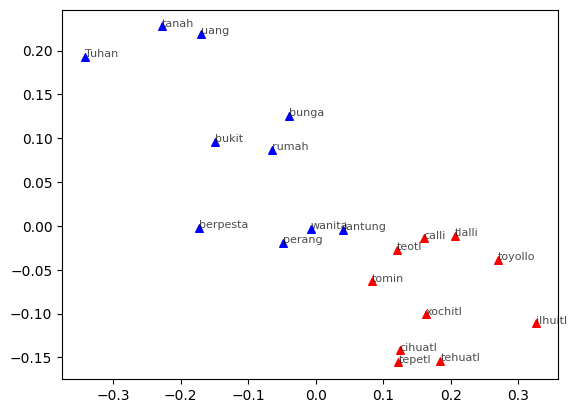

In [43]:
MAX_WORDS_TO_DISPLAY = 10

def plot_bilingual_embeddings(embeddings1, embeddings2, selected_words):
  count_words_displayed = 0
  for id_word, nah_word in selected_words:
      if id_word in embeddings1 and nah_word in embeddings2:
        count_words_displayed += 1
      else:
        continue
      word = id_word
      coord = embeddings1[word]
      plt.scatter(coord[0], coord[1], color='blue', marker='^', s=30, label='Indonesian' if count_words_displayed == 0 else None)
      plt.annotate(word, (coord[0], coord[1]), fontsize=8, alpha=0.7)

      word = nah_word
      coord = embeddings2[word]
      plt.scatter(coord[0], coord[1], color='red', marker='^', s=30, label='Nahuatl' if count_words_displayed == 0 else None)
      plt.annotate(word, (coord[0], coord[1]), fontsize=8, alpha=0.7)
      if count_words_displayed == MAX_WORDS_TO_DISPLAY:
        break

plot_bilingual_embeddings(ori_id_word_norm_embeddings, ori_nah_word_norm_embeddings, id_nah_test)

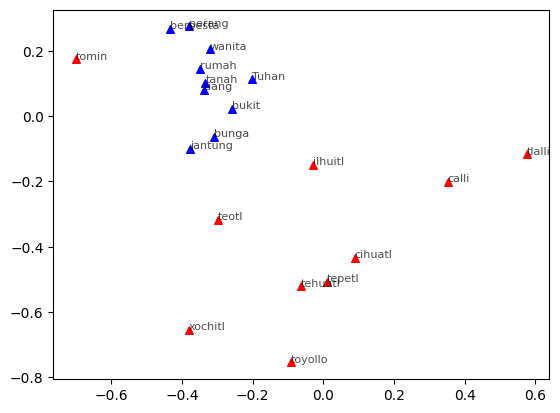

In [44]:
plot_bilingual_embeddings(unsup_id_word_embeddings, unsup_nah_word_embeddings, id_nah_test)

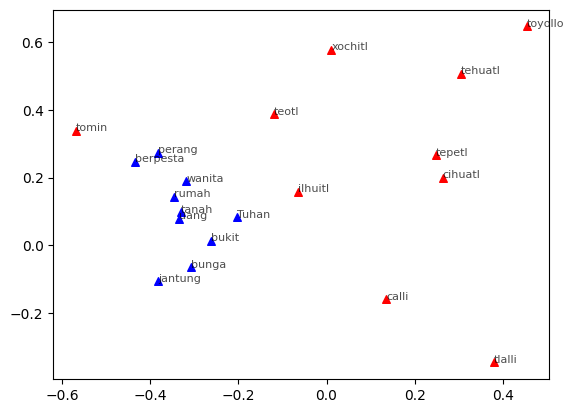

In [45]:
plot_bilingual_embeddings(semisup_num_id_word_embeddings, semisup_num_nah_word_embeddings, id_nah_test)

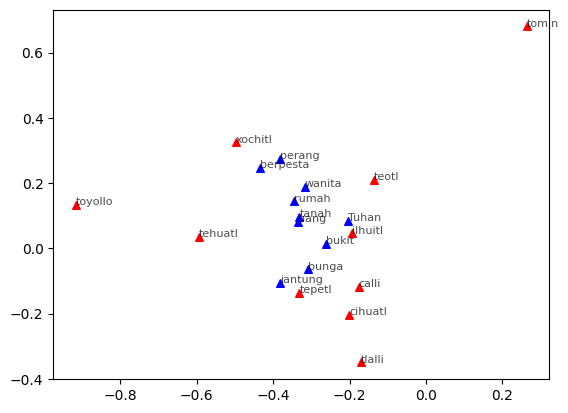

In [46]:
plot_bilingual_embeddings(semisup_27_id_word_embeddings, semisup_words_nah_word_embeddings, id_nah_test)

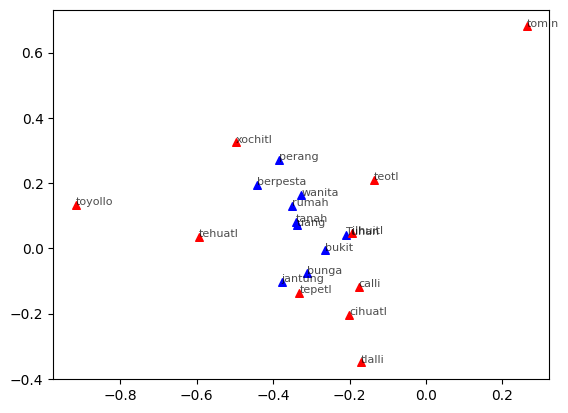

In [47]:
plot_bilingual_embeddings(semisup_1500_id_word_embeddings, semisup_words_nah_word_embeddings, id_nah_test)